https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [51]:
%matplotlib inline

In [60]:
import csv
import math
import random

def loadCsv(filename):
lines = csv.reader(open(r'C:\Users\Kislay\Desktop\pima-indians-diabetes.data.csv')
)
dataset = list(lines)
for i in range(len(dataset)):
dataset[i] = [float(x) for x in dataset[i]]
return dataset

def splitDataset(dataset, splitRatio):
trainSize = int(len(dataset) * splitRatio)
trainSet = []
copy = list(dataset)
while len(trainSet) &amp;lt; trainSize:
index = random.randrange(len(copy))
trainSet.append(copy.pop(index))
return [trainSet, copy]

def separateByClass(dataset):
separated = {}
for i in range(len(dataset)):
vector = dataset[i]
if (vector[-1] not in separated):
separated[vector[-1]] = []
separated[vector[-1]].append(vector)
return separated

def mean(numbers):
return sum(numbers)/float(len(numbers))

def stdev(numbers):
avg = mean(numbers)
variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
return math.sqrt(variance)

def summarize(dataset):
summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
del summaries[-1]
return summaries

def summarizeByClass(dataset):
separated = separateByClass(dataset)
summaries = {}
for classValue, instances in separated.items():
summaries[classValue] = summarize(instances)
return summaries

def calculateProbability(x, mean, stdev):
exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
return (1/(math.sqrt(2*math.pi)*stdev))*exponent

def calculateClassProbabilities(summaries, inputVector):
probabilities = {}
for classValue, classSummaries in summaries.items():
probabilities[classValue] = 1
for i in range(len(classSummaries)):
mean, stdev = classSummaries[i]
x = inputVector[i]
probabilities[classValue] *= calculateProbability(x, mean, stdev)
return probabilities

def predict(summaries, inputVector):
probabilities = calculateClassProbabilities(summaries, inputVector)
bestLabel, bestProb = None, -1
for classValue, probability in probabilities.items():
if bestLabel is None or probability &amp;gt; bestProb:
bestProb = probability
bestLabel = classValue
return bestLabel

def getPredictions(summaries, testSet):
predictions = []
for i in range(len(testSet)):
result = predict(summaries, testSet[i])
predictions.append(result)
return predictions

def getAccuracy(testSet, predictions):
correct = 0
for x in range(len(testSet)):
if testSet[x][-1] == predictions[x]:
correct += 1
return (correct/float(len(testSet)))*100.0

def main():
filename = 'pima-indians-diabetes.data.csv'
splitRatio = 0.67
dataset = loadCsv(filename)
trainingSet, testSet = splitDataset(dataset, splitRatio)
print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset),len(trainingSet),len(testSet)))
#prepare model
summaries = summarizeByClass(trainingSet)
#test model
predictions = getPredictions(summaries, testSet)
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: {0}%'.format(accuracy))
main()

IndentationError: expected an indented block (<ipython-input-60-dbcd94c9ec57>, line 6)

In [26]:

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import pandas

d= pandas.read_csv(open('C:/Users/iheeb/Desktop/zzzzz/cloud/325ue-u1z0e.csv'))

model = MultinomialNB()
model.fit(d[['sad','anger','duration','money','relig']], d['category_term'])
expected = d['category_term']
predicted = model.predict(d[['sad','anger','duration','money','relig']])
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

def predict(s,train=d[['sad','anger','duration','money','relig']],model=model):
    p=model.predict(s)
    return p


                       precision    recall  f1-score   support

     Autos & Vehicles       0.00      0.00      0.00        55
               Comedy       0.00      0.00      0.00        23
            Education       0.00      0.00      0.00        32
        Entertainment       0.00      0.00      0.00       150
     Film & Animation       0.00      0.00      0.00        32
               Gaming       0.30      1.00      0.46       338
        Howto & Style       0.00      0.00      0.00        43
                Music       0.00      0.00      0.00        94
      News & Politics       0.00      0.00      0.00        49
Nonprofits & Activism       0.00      0.00      0.00        13
       People & Blogs       0.00      0.00      0.00       158
       Pets & Animals       0.00      0.00      0.00         7
 Science & Technology       0.00      0.00      0.00        47
                Shows       0.00      0.00      0.00         3
               Sports       0.00      0.00      0.00  

c:\users\azzak\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.33496097719861234, 0.4965593057641423, 0.4965593057641423, 0.4965593057641423, 0.33496097719861234, 0.4965593057641423, 0]


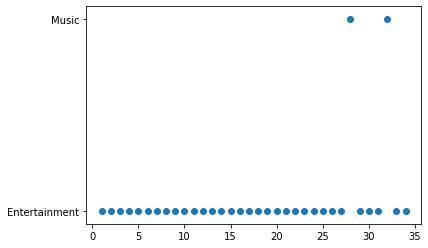

In [25]:
p=predict(d[d.id>1000][['sad','anger','duration','money','relig']])

category=['Music', 'Shows', 'Gaming', 'Sports', 'Trailers', 'Pets & Animals', 'Science & Technology', 'Travel & Events', 'Education', 'Entertainment', 'Autos & Vehicles', 'People & Blogs', 'Film & Animation', 'Howto & Style', 'News & Politics', 'Comedy', 'Nonprofits & Activism']
mospred=[0]*len(p)
l=[0]*len(category)
m=[0]*len(category)
a=d['averageViewDuration']
b=d['duration']
y=[c/d for c,d in zip(a,b)]
x=d['category_term']
for i in range (0,len(y)-1):
    for j in range (0,len(category)-1):
        if (x[i]==category[j]) :
            l[j]=l[j]+y[i]
            m[j]=m[j]+1
for j in range (0,len(category)-1):
    if (m[j]!=0):
        l[j]=l[j]/m[j]

for i in range (0,len(p)-1):
    for j in range (0,len(category)-1):
        if (p[i]==category[j]) :
            mospred[i]=l[j]
print(mospred)
n=[i for i in range(1,len(p)+1)]
import matplotlib.pylab
matplotlib.pylab.scatter(n,p)